In [2]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram


In [114]:
n =8
#number of qbits of the circuit
n_q= n
#number of outputs extracted
n_b= n
qc_output = QuantumCircuit(n_q,n_b)

In [115]:
for i in range(n):
    qc_output.measure(i,i)

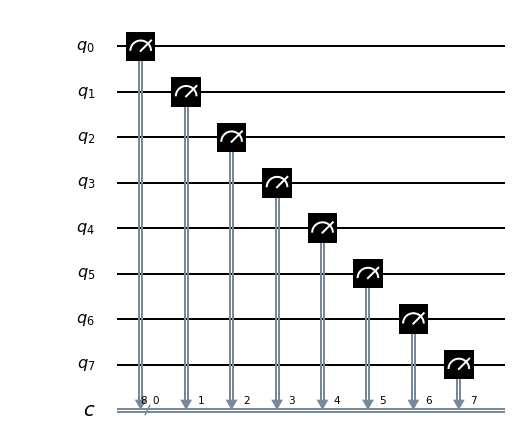

In [116]:
qc_output.draw(output= 'mpl')

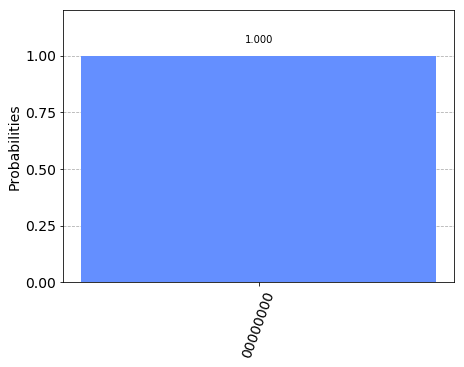

In [117]:
counts = execute(qc_output,Aer.get_backend('qasm_simulator')).result().get_counts()
# randomness in the result
plot_histogram(counts)


ADDER CIRCUIT

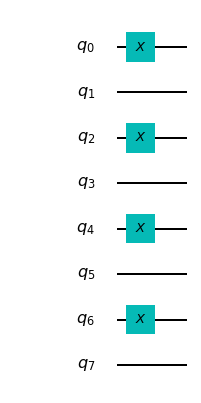

In [123]:
import numpy as np
qc_encode = QuantumCircuit(n)
# x == turns 1 to 0 
for i in range(0,n,2):
   qc_encode.x(i)

qc_encode.draw(output = 'mpl')

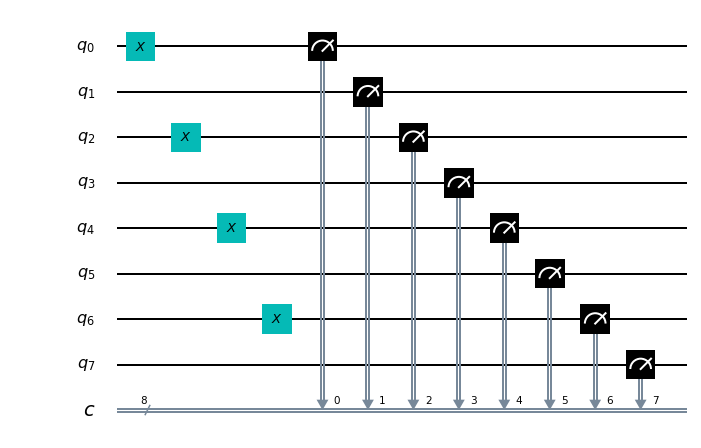

In [124]:
# order is important
qc= qc_encode +qc_output
qc.draw(output='mpl', justify ='none')


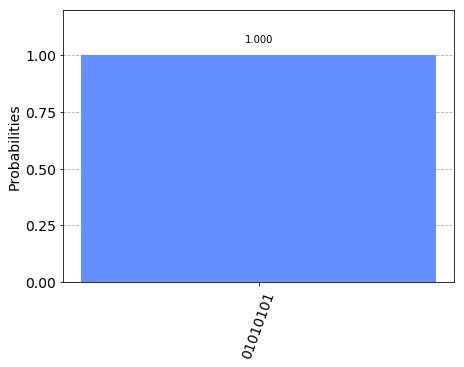

In [125]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

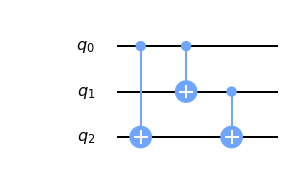

In [8]:
qc_cnot = QuantumCircuit(3)
# .cx(control,target)
qc_cnot.cx(0,2)
qc_cnot.cx(0,1)
qc_cnot.cx(1,2)
qc_cnot.draw(output = 'mpl')

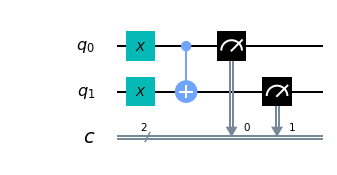

In [24]:
qc = QuantumCircuit(2,2)
qc.x(1)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw(output= 'mpl')

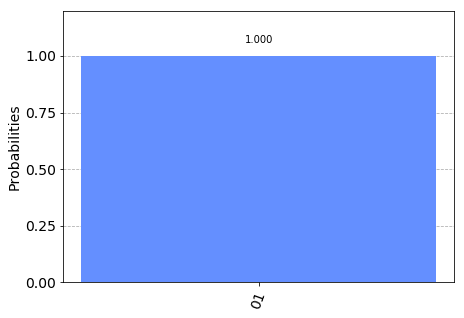

In [25]:
counts = execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

To avoid overwriting use gate CNOTs

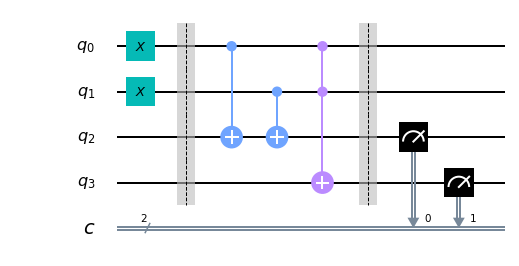

In [27]:
qc_ha = QuantumCircuit(4,2)
# encode the qubits
qc_ha.x(0) #if qubit 0 is equal to 1 i.e. q_0 = 1
qc_ha.x(1) # if qubit 1 is equal to 1 i.e. q_1 =1
qc_ha.barrier()
# Use cnots to determine the inputs of qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# for the combination 11 use ccx  toffoli gate
qc_ha.ccx(0,1,3)
qc_ha.barrier()
#extract outputs
qc_ha.measure(2,0)
qc_ha.measure(3,1)

# draw
qc_ha.draw(output= 'mpl')

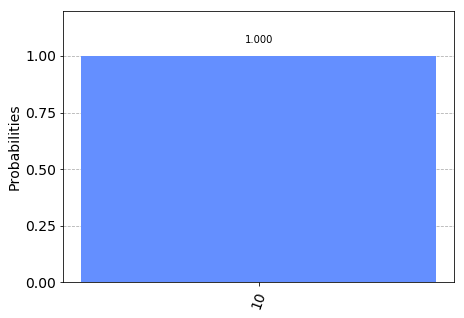

In [29]:
 counts = execute(qc_ha, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [31]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.12.0',
 'qiskit-aer': '0.4.1',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.5.0',
 'qiskit-aqua': '0.6.5',
 'qiskit': '0.16.2'}